**In Order to accelerate decision making for banks, this project aims to help determine if a customer is eligible for a loan or not:**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [59]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# data_path_zip= "/content/drive/MyDrive/Loan Prediction/archive (14).zip"

In [2]:
data_path="/content/drive/MyDrive/Loan Prediction"

In [ ]:
# from zipfile import ZipFile

In [ ]:
# with ZipFile(data_path_zip, 'r') as ZipObj:
#   ZipObj.extractall(data_path)

##Data Reading
>

In [60]:
data = pd.read_csv("/content/drive/MyDrive/Loan Prediction/loan_data_set.csv")

In [61]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [62]:
data.shape

(614, 13)

##Data Exploration
>




1. *We'll start exploring with the catagorical variables*





In [18]:
data.Loan_ID.value_counts(dropna=False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [19]:
data.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

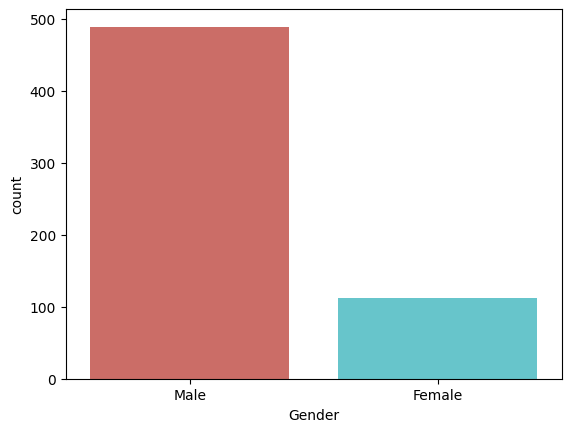

In [20]:
sns.countplot(x="Gender", data=data, palette="hls")
plt.show()

In [21]:
data.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

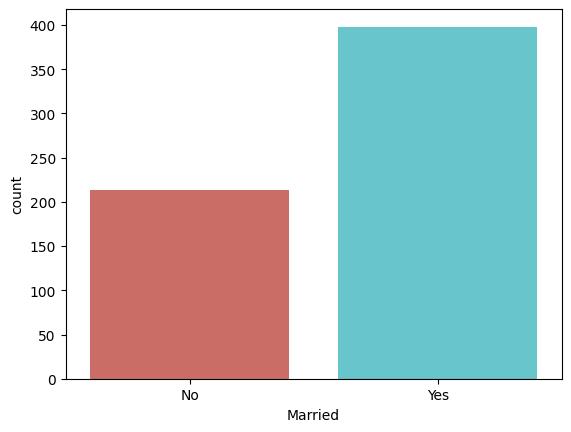

In [22]:
sns.countplot(x="Married", data=data, palette="hls")
plt.show()

In [23]:
data.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

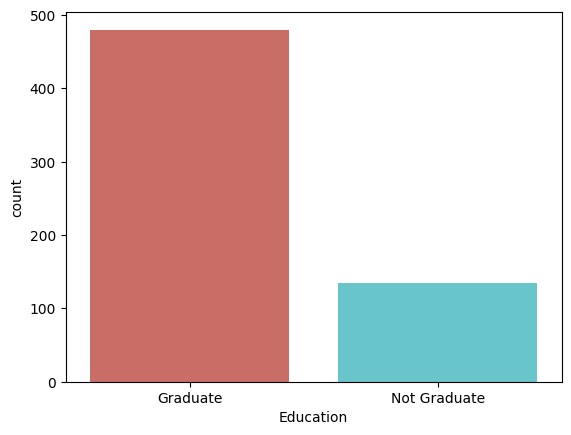

In [24]:
sns.countplot(x="Education", data=data, palette="hls")
plt.show()

In [25]:
data.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

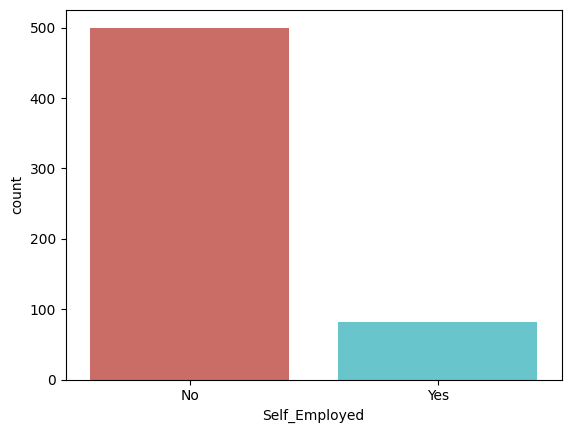

In [26]:
sns.countplot(x="Self_Employed", data=data, palette="hls")
plt.show()

In [27]:
data.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

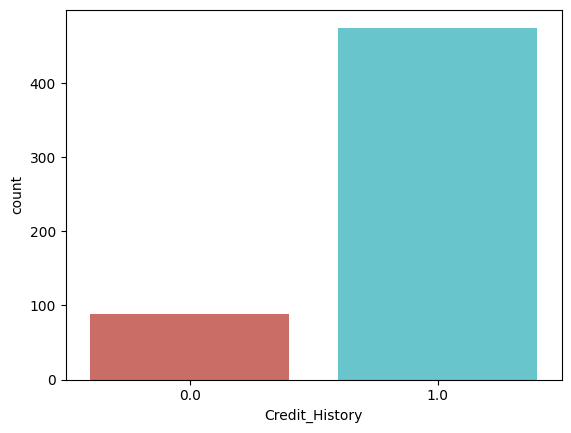

In [28]:
sns.countplot(x="Credit_History", data=data, palette="hls")
plt.show()

In [29]:
data.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

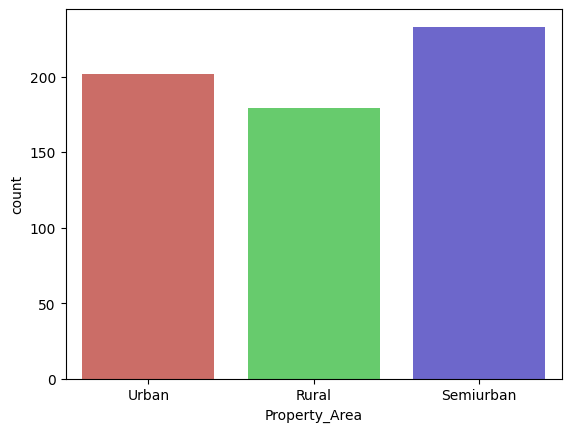

In [30]:
sns.countplot(x="Property_Area", data=data, palette="hls")
plt.show()

In [31]:
data.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

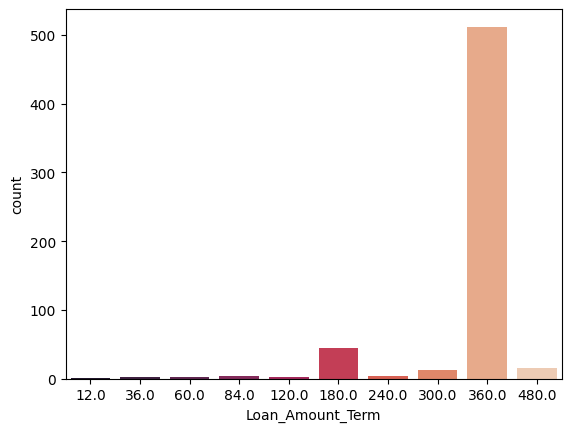

In [32]:
sns.countplot(x="Loan_Amount_Term", data=data, palette="rocket")
plt.show()

As can be seen from the results, the 360 days loan duration is the most popular compared to others

In [33]:
data.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

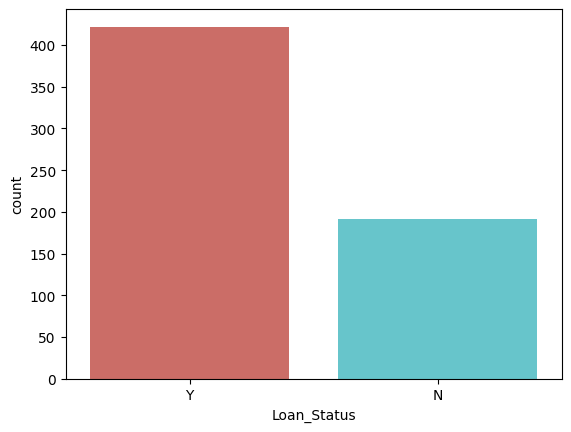

In [34]:
sns.countplot(x="Loan_Status", data=data, palette="hls")
plt.show()

We clearly notice that we have some missing values on most of the categorical variables and our target variable is unbalanced


2.   *Numerical Variable*







In [35]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


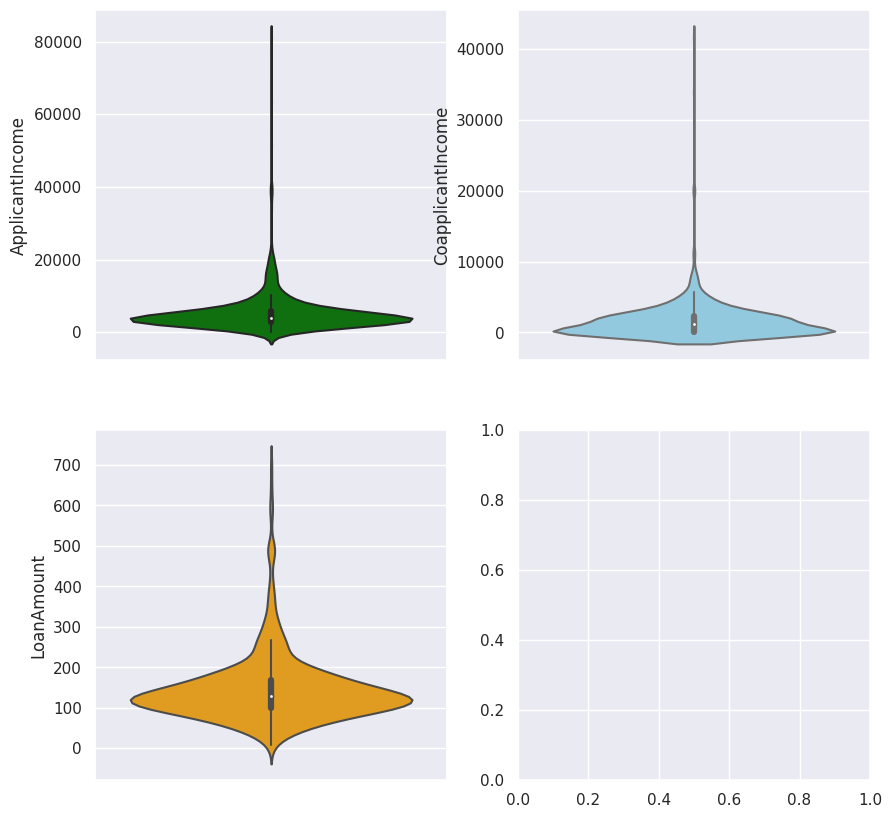

In [36]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=data, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=data, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=data, y="LoanAmount", ax=axs1[1, 0], color='orange');

We can notice our variables have outliers

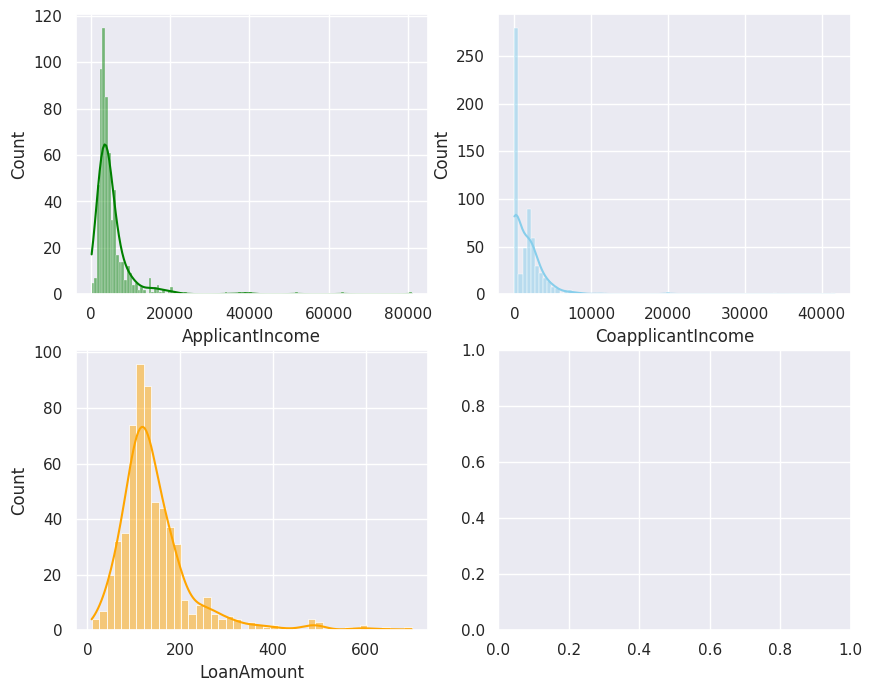

In [37]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

We can notice our variable's distribution are positively skewed

<ipython-input-38-45f618d61ec9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='inferno');


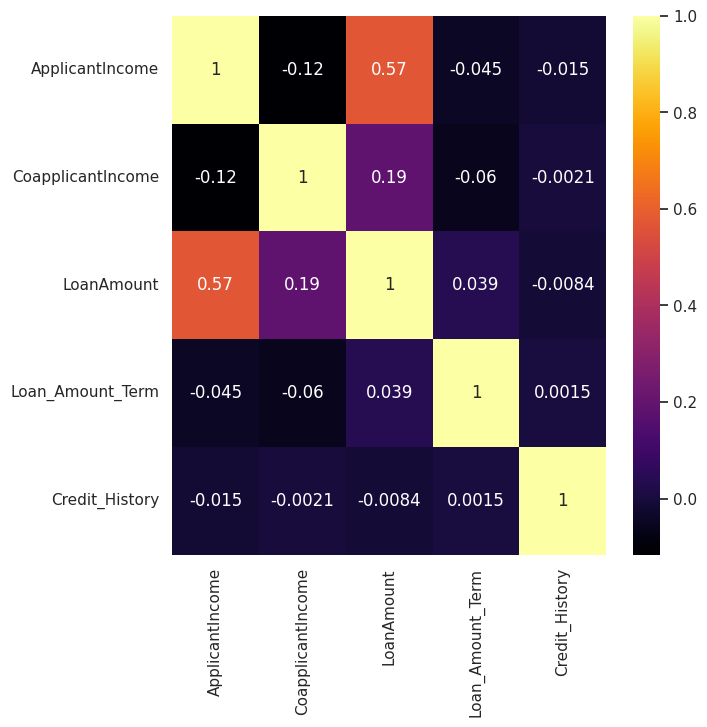

In [38]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True, cmap='inferno');

 There is positive correlation between Loan Amount and Applicant Income

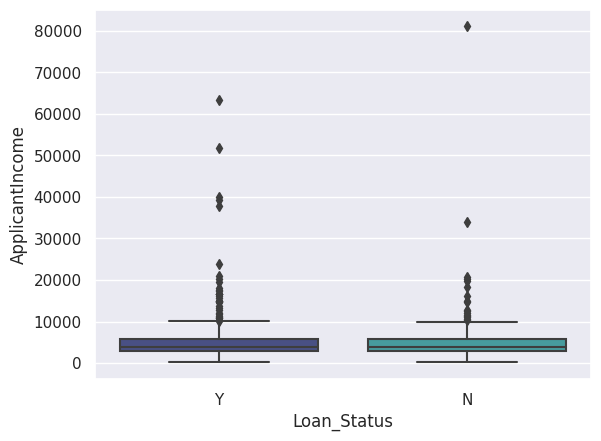

In [39]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=data, palette="mako");

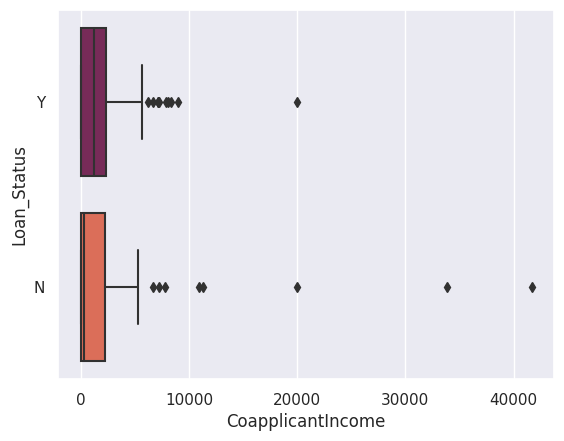

In [40]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=data, palette="rocket");

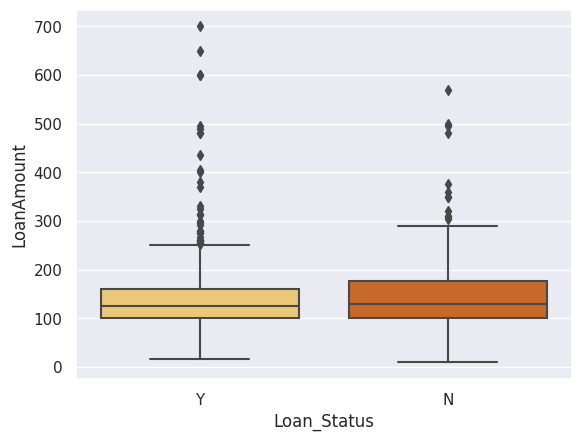

In [41]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=data, palette="YlOrBr");

checking correlation between CoapplicantIncome and ApplicantIncom



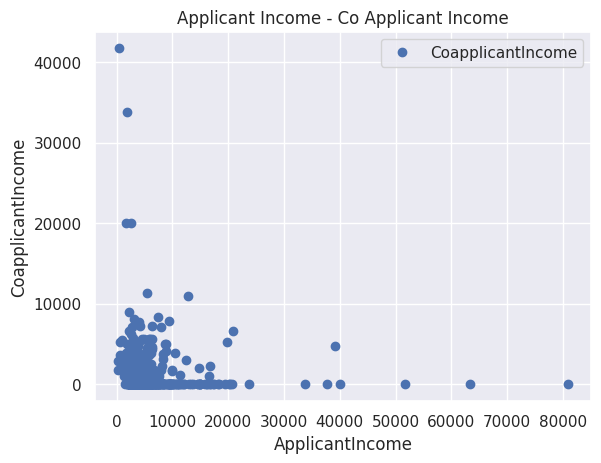

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40, df=1226.0)


In [42]:
from scipy import stats
data.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
plt.title('Applicant Income - Co Applicant Income')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.show()
print('Pearson correlation:', data['ApplicantIncome'].corr(data['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(data['ApplicantIncome'], data['CoapplicantIncome']))

In [43]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

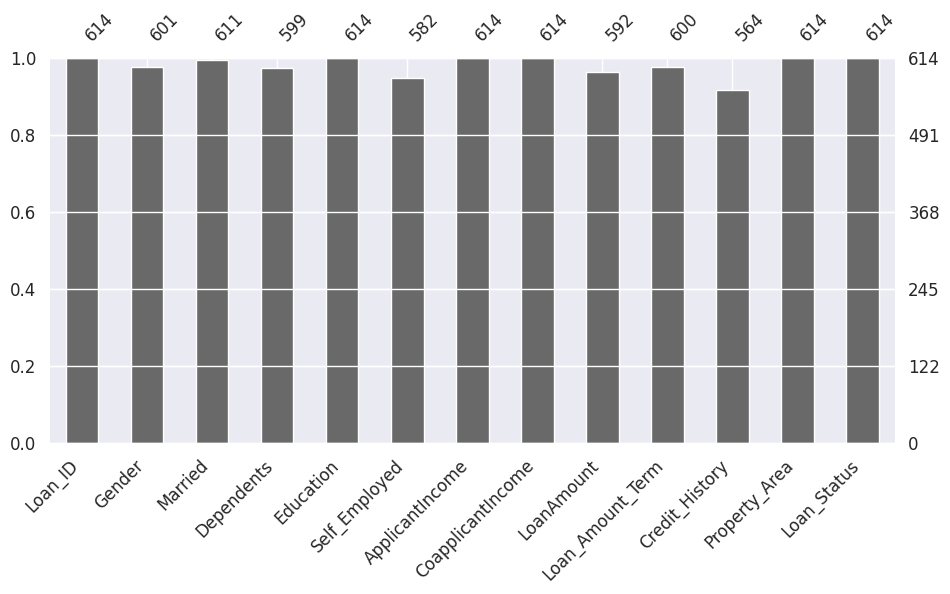

In [63]:
import missingno as mso
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(data, ax = axz, fontsize = 12);

Drop Unecessary Variables

In [64]:
data = data.drop(['Loan_ID'], axis = 1)

Categorical Data Missing values

In [65]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

Numerical Variiables

In [66]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [67]:

data = pd.get_dummies(data)

# Drop columns
data = data.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

data.rename(columns=new, inplace=True)

In [68]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [69]:
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [70]:
data = pd.concat([data, data.select_dtypes(exclude=[np.number])], axis=1)

In [71]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
13,1853,2840.0,114.000000,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0
15,4950,0.0,125.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
19,2600,3500.0,115.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,3182,2917.0,161.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
586,2297,1522.0,104.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1
588,4750,0.0,94.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,1,0,1
603,3676,4301.0,172.000000,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,1


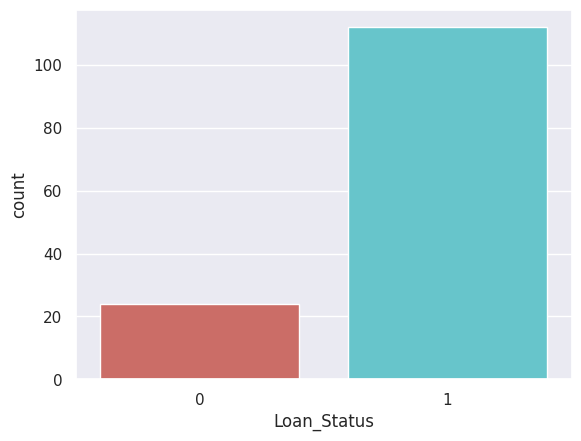

In [72]:
sns.countplot(x="Loan_Status", data=data, palette="hls")
plt.show()

In [73]:
data.ApplicantIncome = np.sqrt(data.ApplicantIncome)
data.CoapplicantIncome = np.sqrt(data.CoapplicantIncome)
data.LoanAmount = np.sqrt(data.LoanAmount)

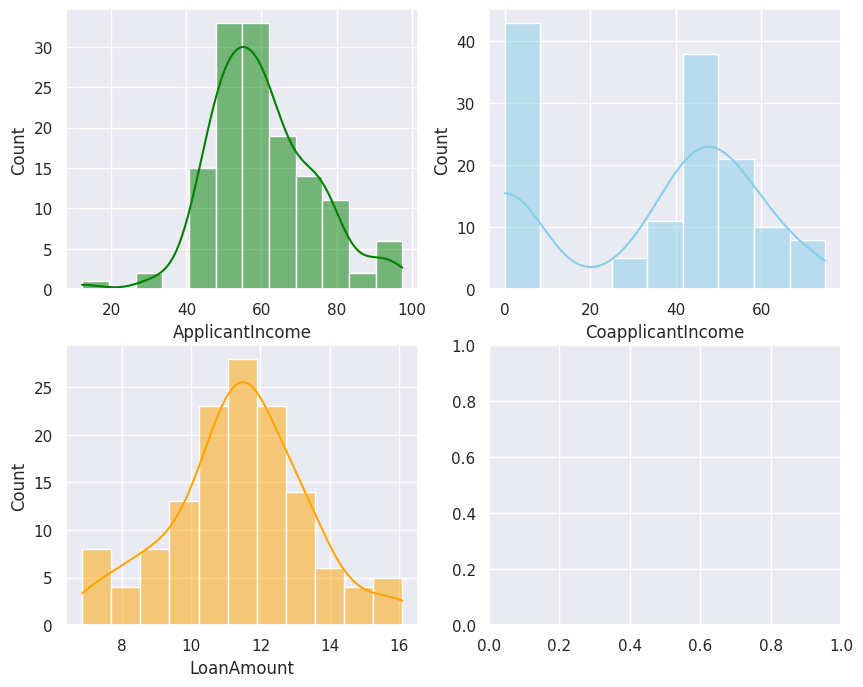

In [74]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [75]:
X = data.drop(["Loan_Status"], axis=1)
y = data["Loan_Status"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Logistic regression model

In [89]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9285714285714286
Confusion Matrix:
[[ 0  2]
 [ 0 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.93      1.00      0.96        26

    accuracy                           0.93        28
   macro avg       0.46      0.50      0.48        28
weighted avg       0.86      0.93      0.89        28



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The previous results were for training the models on unbalanced data, yet the results weren't the best, hence why we'll use the oversampling technique to balance the classes

In [80]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

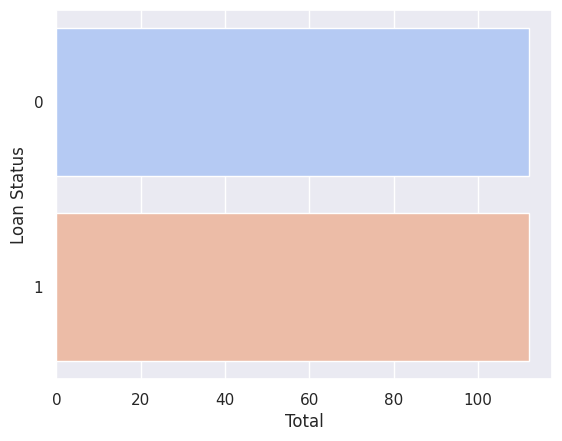

In [81]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=data, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

Now we're going to retrain the same models on the balanced data

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#LogisticRegression

In [90]:
clf_B = LogisticRegression(random_state=0).fit(X_train, y_train)

In [91]:
y_pred=clf_B.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = clf_B.predict(X_test)
report = classification_report(y_test, y_pred)
LRAcc = accuracy_score(y_pred,y_test)
print(report)



              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.79      0.86      0.83        22

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45



Applying Grid search for the previous model in order to fine-tune its hyperparameteres

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [95]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=clf_B, param_grid=param_grid, cv=5)

In [96]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [100]:
best_params = grid_search.best_params_
best_model1 = grid_search.best_estimator_


In [101]:
print(best_params)

{'C': 100, 'penalty': 'l2'}


In [103]:
print(best_model1)

LogisticRegression(C=100, random_state=0)


In [104]:
final_model=best_model1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
y_pred_final = final_model.predict(X_test)

In [106]:
report = classification_report(y_test, y_pred_final)

In [107]:
print(report)

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.76      0.86      0.81        22

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.81      0.80      0.80        45



Random search

In [ ]:

data.to_csv('filtered_data_loan.csv', index=False)


#Decision Tree

In [108]:

from sklearn.tree import DecisionTreeClassifier
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

Decision Tree Accuracy: 80.00%


In [109]:
from sklearn.model_selection import GridSearchCV


# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 21],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Perform the grid search
grid_search.fit(X_train, y_train)
# Print the best hyperparameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Accuracy:  0.8436507936507937


In [116]:
tree_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 5)

In [117]:
modelTree=tree_model.fit(X_train, y_train)

In [118]:
y_pred_finalTree = modelTree.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
reportTree = classification_report(y_test, y_pred_finalTree)
DTAcc=accuracy_score(y_pred,y_test)

In [140]:
print(DTAcc)

0.7777777777777778


In [141]:
print(reportTree)

              precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.74      0.64      0.68        22

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45



In [ ]:
clf.feature_importances_

from sklearn.tree import plot_tree
plt.figure(figsize=(100,175))
plot_tree(clf)
plt.show()

SVM

In [122]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.49      1.00      0.66        22

    accuracy                           0.49        45
   macro avg       0.24      0.50      0.33        45
weighted avg       0.24      0.49      0.32        45

[[ 0 23]
 [ 0 22]]
SVC accuracy: 48.89%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test

96     1
203    0
169    0
136    0
182    0
150    0
44     0
198    0
64     1
8      1
107    1
37     0
5      1
145    0
63     1
184    0
139    0
206    0
207    0
90     1
110    1
74     1
125    1
75     1
155    0
12     1
158    0
160    0
124    1
135    1
55     1
104    1
156    0
171    0
18     1
15     0
92     1
7      1
76     1
162    0
97     1
143    0
152    0
106    1
201    0
Name: Loan_Status, dtype: uint8

In [123]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']

}
grid_search0 = GridSearchCV(SVCclassifier, param_grid, cv=5)

In [124]:
grid_search0.fit(X_train, y_train)
svm_model=grid_search0.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-

In [125]:
print(svm_model)

SVC(C=0.1, kernel='linear', max_iter=500)


In [126]:
y_pred = svm_model.predict(X_test)

In [127]:

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        23
           1       0.71      0.77      0.74        22

    accuracy                           0.73        45
   macro avg       0.74      0.73      0.73        45
weighted avg       0.74      0.73      0.73        45

[[16  7]
 [ 5 17]]
SVC accuracy: 73.33%


KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

KNN best accuracy: 84.44%


In [131]:


param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
}


knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
knn_model= KNeighborsClassifier(n_neighbors = 1, weights='uniform')
print("Best KNN parameters:", best_params)
print("Best KNN accuracy: {:.2f}%".format(best_accuracy * 100))


Best KNN parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best KNN accuracy: 73.75%


In [137]:
KNAcc=best_accuracy

Comparaison

In [142]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors',
                                  'SVM',   'Decision Tree',
],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100,
                                     DTAcc*100,
                                     ]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,82.222222
3,Decision Tree,77.777778
1,K Neighbors,73.746032
2,SVM,73.333333


 #Random Forest

In [144]:



rf_classifier = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Random Forest Model Accuracy: {accuracy}')
print(f'Best Parameters: {best_params}')


Best Random Forest Model Accuracy: 0.9111111111111111
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [145]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(min_samples_leaf=1,max_depth=None, n_estimators = 200,min_samples_split=2)
RFclassifier.fit(X_train, y_train)
RFAcc=RFclassifier.score(X_test, y_test)

print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

Random Forest Accuracy:  93.33%


Voting

In [135]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

voting_classifier = VotingClassifier(
    estimators=[
        ('logreg', best_model1),
        ('knn', knn_model),
        ('tree', tree_model),
        ('svm', svm_model)
    ],
    voting='hard'
)


voting_classifier.fit(X_train, y_train)


y_pred = voting_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy}')

Ensemble Model Accuracy: 0.7777777777777778


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
